In [2]:
!pip install folium

In [9]:
import pandas as pd
import folium
import random
from sklearn import cluster

pd10 = pd.read_csv('충청북도 옥천군_경로당현황_좌표추가.csv')
pd20 = pd.read_csv('충청북도 옥천군_음식점현황_좌표추가.csv') 

In [10]:
pd10

,연번,읍면,경로당명,경로당 주소,Latitude,Longitude,데이터기준일
0,1,옥천읍,죽향1,충청북도 옥천군 옥천읍 향수2길 46-11,36.316840,127.581309,2022-06-15
1,2,옥천읍,죽향2,"충청북도 옥천군 옥천읍 성왕로 1274, 옥향@",36.317056,127.578444,2022-06-15
2,3,옥천읍,죽향3,"충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101",36.316055,127.578065,2022-06-15
3,4,옥천읍,문정1,충청북도 옥천군 옥천읍 향수2길 9,36.313722,127.579357,2022-06-15
4,5,옥천읍,문정2,충청북도 옥천군 옥천읍 문정2길 13-15,36.305198,127.573288,2022-06-15
...,...,...,...,...,...,...,...
304,305,군북면,안말(국원),충청북도 옥천군 군북면 국원3길 45-2,36.350943,127.585766,2022-06-15
305,306,군북면,소정,충청북도 옥천군 군북면 소정2길 1,36.355780,127.596461,2022-06-15
306,307,군북면,안말,충청북도 옥천군 군북면 성왕로 1900,36.361852,127.605075,2022-06-15
307,308,군북면,막지,충청북도 옥천군 군북면 답양막지길 404,36.374981,127.606851,2022-06-15


In [11]:
pd10 = pd10.rename(columns={"경로당명": "경로당명/음식점명"})
pd10 = pd10.rename(columns={"경로당 주소": "도로명 주소"})
pd10

,연번,읍면,경로당명/음식점명,도로명 주소,Latitude,Longitude,데이터기준일
0,1,옥천읍,죽향1,충청북도 옥천군 옥천읍 향수2길 46-11,36.316840,127.581309,2022-06-15
1,2,옥천읍,죽향2,"충청북도 옥천군 옥천읍 성왕로 1274, 옥향@",36.317056,127.578444,2022-06-15
2,3,옥천읍,죽향3,"충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101",36.316055,127.578065,2022-06-15
3,4,옥천읍,문정1,충청북도 옥천군 옥천읍 향수2길 9,36.313722,127.579357,2022-06-15
4,5,옥천읍,문정2,충청북도 옥천군 옥천읍 문정2길 13-15,36.305198,127.573288,2022-06-15
...,...,...,...,...,...,...,...
304,305,군북면,안말(국원),충청북도 옥천군 군북면 국원3길 45-2,36.350943,127.585766,2022-06-15
305,306,군북면,소정,충청북도 옥천군 군북면 소정2길 1,36.355780,127.596461,2022-06-15
306,307,군북면,안말,충청북도 옥천군 군북면 성왕로 1900,36.361852,127.605075,2022-06-15
307,308,군북면,막지,충청북도 옥천군 군북면 답양막지길 404,36.374981,127.606851,2022-06-15


In [12]:
pd10 = pd10.drop("연번", axis=1)
pd10 = pd10.drop("읍면",axis=1)
pd10 = pd10.drop("데이터기준일", axis=1)
pd10 = pd10.dropna()
pd10

,경로당명/음식점명,도로명 주소,Latitude,Longitude
0,죽향1,충청북도 옥천군 옥천읍 향수2길 46-11,36.316840,127.581309
1,죽향2,"충청북도 옥천군 옥천읍 성왕로 1274, 옥향@",36.317056,127.578444
2,죽향3,"충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101",36.316055,127.578065
3,문정1,충청북도 옥천군 옥천읍 향수2길 9,36.313722,127.579357
4,문정2,충청북도 옥천군 옥천읍 문정2길 13-15,36.305198,127.573288
...,...,...,...,...
304,안말(국원),충청북도 옥천군 군북면 국원3길 45-2,36.350943,127.585766
305,소정,충청북도 옥천군 군북면 소정2길 1,36.355780,127.596461
306,안말,충청북도 옥천군 군북면 성왕로 1900,36.361852,127.605075
307,막지,충청북도 옥천군 군북면 답양막지길 404,36.374981,127.606851


In [13]:
pd20 = pd20.rename(columns={"업소명": "경로당명/음식점명"})
pd20 = pd20.rename(columns={"소재지(도로명)": "도로명 주소"})
pd20 = pd20[1:]
pd20

,연번,업종명,군분,경로당명/음식점명,도로명 주소,Latitude,Longitude,소재지(지번),소재지전화,데이터기준일
1,1.0,일반음식점,한식,중앙집,충청북도 옥천군 군서면 동평4길 4,36.2724864,127.5271976,충청북도 옥천군 군서면 동평리 428-9,043- 732-4009,2022-09-20
2,2.0,일반음식점,한식,선광집,충청북도 옥천군 청산면 지전2길 14,36.3461465,127.7893715,충청북도 옥천군 청산면 지전리 162-8,043 -732 -8404,2022-09-20
3,3.0,일반음식점,한식,별미올갱이,충청북도 옥천군 옥천읍 삼금로2길 3-1,36.300024,127.5662842,충청북도 옥천군 옥천읍 금구리 191-41,043- 731-4423,2022-09-20
4,4.0,일반음식점,한식,류 집,NaN,NaN,NaN,충청북도 옥천군 청성면 산계리 203-2,NaN,2022-09-20
5,5.0,일반음식점,식육(숯불구이),한양식당,충청북도 옥천군 군서면 동평1길 7-3,36.2781755,127.5282883,충청북도 옥천군 군서면 동평리 491-4,043 -732 -4005,2022-09-20
...,...,...,...,...,...,...,...,...,...,...
932,932.0,휴게음식점,커피숍,우슬초,충청북도 옥천군 동이면 선사로 50,36.3124454,127.6103875,충청북도 옥천군 동이면 남곡리 360-1,NaN,2022-09-20
933,933.0,휴게음식점,기타 휴게음식점,향 스토리,충청북도 옥천군 군서면 성왕로 240,36.2798552,127.5287089,충청북도 옥천군 군서면 상지리 9-5,NaN,2022-09-20
934,934.0,휴게음식점,커피숍,업스테어,"충청북도 옥천군 옥천읍 관성로 50, 2층",36.301962,127.5722771,충청북도 옥천군 옥천읍 문정리 386-8,NaN,2022-09-20
935,935.0,휴게음식점,기타 휴게음식점,대한민국 푸드트럭 협회,충청북도 옥천군 옥천읍 금장로 109,36.2981391,127.5747411,충청북도 옥천군 옥천읍 금구리 97-8,NaN,2022-09-20


In [14]:
pd20 = pd20.drop("연번", axis=1)
pd20 = pd20.drop("업종명", axis=1)
pd20 = pd20.drop("군분", axis=1)
pd20 = pd20.drop("소재지(지번)",axis=1)
pd20 = pd20.drop("소재지전화", axis=1)
pd20 = pd20.drop("데이터기준일", axis=1)
pd20 = pd20[:-1].dropna()
pd20

,경로당명/음식점명,도로명 주소,Latitude,Longitude
1,중앙집,충청북도 옥천군 군서면 동평4길 4,36.2724864,127.5271976
2,선광집,충청북도 옥천군 청산면 지전2길 14,36.3461465,127.7893715
3,별미올갱이,충청북도 옥천군 옥천읍 삼금로2길 3-1,36.300024,127.5662842
5,한양식당,충청북도 옥천군 군서면 동평1길 7-3,36.2781755,127.5282883
6,금강집,충청북도 옥천군 청산면 지전1길 23,36.3458569,127.7920893
...,...,...,...,...
931,비움과한끼식사 카페 옥천점,충청북도 옥천군 군북면 감로길 18,36.3484533,127.5303483
932,우슬초,충청북도 옥천군 동이면 선사로 50,36.3124454,127.6103875
933,향 스토리,충청북도 옥천군 군서면 성왕로 240,36.2798552,127.5287089
934,업스테어,"충청북도 옥천군 옥천읍 관성로 50, 2층",36.301962,127.5722771


## 원핫인코딩 코드
혹시 몰라서 살려둠!!

In [15]:
# pd10 원핫인코딩
#읍면 정보 col 추가
loc = ['옥천읍','이원면','안내면','안남면','군서면','군북면','동이면','청산면','청성면']

# 도로명주소에 '옥천읍'이 포함된 경우 col로 '은평구'를 추가
pd10['읍면'] = pd10.apply(lambda x: ' '.join([i for i in loc if i in x['도로명 주소']]), axis=1)
pd20['읍면'] = pd20.apply(lambda x: ' '.join([i for i in loc if i in x['도로명 주소']]), axis=1)

In [27]:
#원핫인코딩
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

onehot_읍면10 = label_encoder.fit_transform(pd10['읍면'])
onehot_읍면20 = label_encoder.fit_transform(pd20['읍면'])

pd10['loc'] = onehot_읍면10
pd20['loc'] = onehot_읍면20

print(pd10.head())
print(pd20.head())

#dfw.to_excel('파일명.xlsx', encoding='utf-8', index=False)

  경로당명/음식점명                            도로명 주소   Latitude   Longitude   읍면  loc
0       죽향1           충청북도 옥천군 옥천읍 향수2길 46-11  36.316840  127.581309  옥천읍    5
1       죽향2        충청북도 옥천군 옥천읍 성왕로 1274, 옥향@  36.317056  127.578444  옥천읍    5
2       죽향3  충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101  36.316055  127.578065  옥천읍    5
3       문정1               충청북도 옥천군 옥천읍 향수2길 9  36.313722  127.579357  옥천읍    5
4       문정2           충청북도 옥천군 옥천읍 문정2길 13-15  36.305198  127.573288  옥천읍    5
  경로당명/음식점명                  도로명 주소    Latitude    Longitude   읍면  loc
1       중앙집     충청북도 옥천군 군서면 동평4길 4  36.2724864  127.5271976  군서면    1
2       선광집    충청북도 옥천군 청산면 지전2길 14  36.3461465  127.7893715  청산면    7
3     별미올갱이  충청북도 옥천군 옥천읍 삼금로2길 3-1   36.300024  127.5662842  옥천읍    5
5      한양식당   충청북도 옥천군 군서면 동평1길 7-3  36.2781755  127.5282883  군서면    1
6       금강집    충청북도 옥천군 청산면 지전1길 23  36.3458569  127.7920893  청산면    7


# merged_df랑 target 합칠 때 target에 'loc' column 추가해서 읍면 원핫인코딩 번호 추가 필요

target1에 작성해두긴 함

In [21]:
def merge_dataframes(pd10, pd20):
    # 두 데이터프레임을 합침
    merged_df = pd.concat([pd10, pd20], ignore_index=True)
    return merged_df

merged_df = merge_dataframes(pd10, pd20)
merged_df

,경로당명/음식점명,도로명 주소,Latitude,Longitude,읍면,loc
0,죽향1,충청북도 옥천군 옥천읍 향수2길 46-11,36.31684,127.581309,옥천읍,5
1,죽향2,"충청북도 옥천군 옥천읍 성왕로 1274, 옥향@",36.317056,127.578444,옥천읍,5
2,죽향3,"충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101",36.316055,127.578065,옥천읍,5
3,문정1,충청북도 옥천군 옥천읍 향수2길 9,36.313722,127.579357,옥천읍,5
4,문정2,충청북도 옥천군 옥천읍 문정2길 13-15,36.305198,127.573288,옥천읍,5
...,...,...,...,...,...,...
1226,비움과한끼식사 카페 옥천점,충청북도 옥천군 군북면 감로길 18,36.3484533,127.5303483,군북면,0
1227,우슬초,충청북도 옥천군 동이면 선사로 50,36.3124454,127.6103875,동이면,2
1228,향 스토리,충청북도 옥천군 군서면 성왕로 240,36.2798552,127.5287089,군서면,1
1229,업스테어,"충청북도 옥천군 옥천읍 관성로 50, 2층",36.301962,127.5722771,옥천읍,5


In [64]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "청성면"이 포함된 행을 뽑음
merged_df_청성면 = merged_df[merged_df["도로명 주소"].str.contains("청성면")]

# 필터링된 데이터프레임 출력
print(merged_df_청성면)

merged_df_청성면.shape[0]

    경로당명/음식점명                    도로명 주소    Latitude    Longitude
152       산계1       충청북도 옥천군 청성면 산계길 42   36.326509    127.75988
153       산계2       충청북도 옥천군 청성면 산계길 81   36.329771   127.759482
154       산계3     충청북도 옥천군 청성면 산계2길 102   36.326332   127.751453
155        거포       충청북도 옥천군 청성면 거포3길 8   36.331178   127.737249
156        상포      충청북도 옥천군 청성면 거포2길 17   36.333988   127.739122
157        만명     충청북도 옥천군 청성면 장수로1길 44   36.314311   127.745618
158        무회   충청북도 옥천군 청성면 장수로2길 36-1   36.306055   127.735433
159        점동    충청북도 옥천군 청성면 장수로 552-3   36.323139    127.72443
160        궁촌     충청북도 옥천군 청성면 궁촌길 19-2   36.308841   127.757607
161        서평       충청북도 옥천군 청성면 소서길 34   36.315823   127.771553
162        소서      충청북도 옥천군 청성면 소서길 243   36.300902   127.774968
163        삼남      충청북도 옥천군 청성면 삼남1길 23   36.296036   127.753983
164       삼거리    충청북도 옥천군 청성면 삼남2길 90-1   36.286519   127.741908
165        조천      충청북도 옥천군 청성면 조천길 213   36.283159   127.757789
166        묘동     충청북도 옥천

49

In [65]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "청산면"이 포함된 행을 뽑음
merged_df_청산면 = merged_df[merged_df["도로명 주소"].str.contains("청산면")]

# 필터링된 데이터프레임 출력
print(merged_df_청산면)

merged_df_청산면.shape[0]

        경로당명/음식점명                      도로명 주소    Latitude    Longitude
191            백운       충청북도 옥천군 청산면 백운길 20-7   36.349032    127.79315
192            분회      충청북도 옥천군 청산면 지전길 32-13   36.345481   127.793974
193            지전        충청북도 옥천군 청산면 지전2길 27   36.346786   127.790584
194          지전여자        충청북도 옥천군 청산면 지전2길 27   36.346786   127.790584
195            교평         충청북도 옥천군 청산면 교평길 26   36.345055   127.797313
...           ...                         ...         ...          ...
1179         호수다방          충청북도 옥천군 청산면 교평길 5  36.3446663  127.7949827
1187        카페시우시   충청북도 옥천군 청산면 지전길 16, 보험회사  36.3443574  127.7950386
1189         청산이레  충청북도 옥천군 청산면 지전길 35, 청산농약사  36.3451648  127.7932741
1211  세븐일레븐 옥천청산점  충청북도 옥천군 청산면 지전길 46, 주택 1층  36.3456675  127.7922237
1214          찐다방       충청북도 옥천군 청산면 지전길 32-5  36.3453741  127.7937054

[91 rows x 4 columns]


91

In [66]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "동이면"이 포함된 행을 뽑음
merged_df_동이면 = merged_df[merged_df["도로명 주소"].str.contains("동이면")]

# 필터링된 데이터프레임 출력
print(merged_df_동이면)

merged_df_동이면.shape[0]

           경로당명/음식점명                   도로명 주소    Latitude    Longitude
74                상촌     충청북도 옥천군 동이면 평산2길 28    36.28493   127.614256
75                평촌      충청북도 옥천군 동이면 평산길 41   36.283151   127.616616
76                소도   충청북도 옥천군 동이면 평산1길 31-1   36.288463   127.617609
77                용운      충청북도 옥천군 동이면 세산2길 6   36.271285   127.604855
78                용암     충청북도 옥천군 동이면 세산2길 74   36.265706    127.60576
...              ...                      ...         ...          ...
1105  (주)금강휴게소(하행4호)     충청북도 옥천군 동이면 금강로 596  36.2789444  127.6720992
1168           강대박카페    충청북도 옥천군 동이면 옥천로 2286  36.2695485  127.6188148
1175     지에스25 동이나래점  충청북도 옥천군 동이면 세산1길 2, 공장  36.2711121  127.6037134
1197            들꽃향기     충청북도 옥천군 동이면 우산로 436  36.2783092  127.6814393
1227             우슬초      충청북도 옥천군 동이면 선사로 50  36.3124454  127.6103875

[83 rows x 4 columns]


83

In [67]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "군북면"이 포함된 행을 뽑음
merged_df_군북면 = merged_df[merged_df["도로명 주소"].str.contains("군북면")]

# 필터링된 데이터프레임 출력
print(merged_df_군북면)

merged_df_군북면.shape[0]

           경로당명/음식점명                     도로명 주소    Latitude    Longitude
280              이백1      충청북도 옥천군 군북면 이백3길15-7    36.33009   127.531993
281              이백2     충청북도 옥천군 군북면 이백1길 3-18   36.328975   127.536487
282               자모     충청북도 옥천군 군북면 자모2길 20-1   36.330033   127.513362
283             윗자모리     충청북도 옥천군 군북면 자모길 186-1   36.323897   127.509559
284               증약     충청북도 옥천군 군북면 증약1길 10-7   36.338679   127.516158
...              ...                        ...         ...          ...
1171      밸리(Valley)      충청북도 옥천군 군북면 추소길 8-41  36.3473014   127.558122
1191           카페대장간   충청북도 옥천군 군북면 비야대정로 176-9  36.3440326  127.5262923
1192          그레이스푸드  충청북도 옥천군 군북면 옥천로 1120, 2호  36.3304739  127.5345728
1193       미니스톱 과수원점    충청북도 옥천군 군북면 옥천로 1104-1  36.3313605  127.5331945
1226  비움과한끼식사 카페 옥천점        충청북도 옥천군 군북면 감로길 18  36.3484533  127.5303483

[99 rows x 4 columns]


99

In [68]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "군서면"이 포함된 행을 뽑음
merged_df_군서면 = merged_df[merged_df["도로명 주소"].str.contains("군서면")]

# 필터링된 데이터프레임 출력
print(merged_df_군서면)

merged_df_군서면.shape[0]

     경로당명/음식점명                         도로명 주소    Latitude    Longitude
259         동산            충청북도 옥천군 군서면 동평1길 7   36.278018   127.528592
260       동산여자           충청북도 옥천군 군서면 동평1길 20   36.278807   127.529455
261         평곡          충청북도 옥천군 군서면 동평4길 9-8   36.273008   127.527831
262         증산         충청북도 옥천군 군서면 금산1길 20-3   36.268873    127.53389
263         금천           충청북도 옥천군 군서면 금산3길 23   36.250688   127.546922
264         사정            충청북도 옥천군 군서면 사정4길 3   36.261041   127.520473
265         향정         충청북도 옥천군 군서면 사정1길 18-5   36.266456   127.525239
266         상지          충청북도 옥천군 군서면 상지1길 8-4   36.254064   127.512072
267         은행         충청북도 옥천군 군서면 은행1길 23-6   36.270182    127.51667
268         상은           충청북도 옥천군 군서면 은행3길 45   36.264786   127.516104
269         사양            충청북도 옥천군 군서면 사양2길 4   36.274107   127.500121
270         상중            충청북도 옥천군 군서면 상중길 92   36.288433   127.518328
271         신대           충청북도 옥천군 군서면 상중1길 17   36.286622    127.52272
272   

55

In [69]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "안남면"이 포함된 행을 뽑음
merged_df_안남면 = merged_df[merged_df["도로명 주소"].str.contains("안남면")]

# 필터링된 데이터프레임 출력
print(merged_df_안남면)

merged_df_안남면.shape[0]

      경로당명/음식점명                         도로명 주소    Latitude    Longitude
106          연주            충청북도 옥천군 안남면 연주2길 9   36.356816   127.674667
107         독락정           충청북도 옥천군 안남면 연주길 150   36.348656   127.667064
108          중촌            충청북도 옥천군 안남면 연주길 70   36.354234   127.672167
109          미산          충청북도 옥천군 안남면 종미3길 106   36.340797   127.670281
110          종배           충청북도 옥천군 안남면 종미1길 41   36.344524   127.674169
111          진벌        충청북도 옥천군 안남면 지수1길 212-1    36.34122   127.683862
112          모산            충청북도 옥천군 안남면 지수2길 6   36.346007   127.689493
113     지수2(수동)           충청북도 옥천군 안남면 안남로 919   36.323404   127.683358
114     잔다리(세교)           충청북도 옥천군 안남면 지수3길 26   36.333318    127.68431
115         서당골           충청북도 옥천군 안남면 도덕2길 64   36.354095   127.682641
116         하서당         충청북도 옥천군 안남면 도덕2길 15-3    36.35406   127.677815
117          도근          충청북도 옥천군 안남면 도덕3길 1-2   36.359542   127.686737
118          덕실           충청북도 옥천군 안남면 도덕1길 85   36.351762   127

33

In [70]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "안내면"이 포함된 행을 뽑음
merged_df_안내면 = merged_df[merged_df["도로명 주소"].str.contains("안내면")]

# 필터링된 데이터프레임 출력
print(merged_df_안내면)

merged_df_안내면.shape[0]

      경로당명/음식점명                       도로명 주소    Latitude    Longitude
129          현1          충청북도 옥천군 안내면 현리길 84   36.394071   127.659849
130         현리2         충청북도 옥천군 안내면 현리5길 15   36.393219   127.648757
131          신촌         충청북도 옥천군 안내면 현리길 131   36.391718   127.655495
132          정곡          충청북도 옥천군 안내면 정방2길 8   36.397312   127.669833
133          방곡         충청북도 옥천군 안내면 정방1길 21   36.393541   127.671764
134          도이          충청북도 옥천군 안내면 도이길 75   36.403573   127.674846
135          동대       충청북도 옥천군 안내면 동대1길 15-2   36.408708   127.669897
136          북대       충청북도 옥천군 안내면 동대5길 39-1     36.4137   127.667821
137         새터말         충청북도 옥천군 안내면 동대4길 19   36.412229   127.671632
138          뱀골         충청북도 옥천군 안내면 서대1길 22   36.408986   127.661627
139          서대         충청북도 옥천군 안내면 방하목로 79   36.411697   127.663806
140         오덕1       충청북도 옥천군 안내면 오덕2길 18-1    36.39251   127.717361
141         오덕2       충청북도 옥천군 안내면 오덕1길 27-4   36.396102   127.695971
142          화인     

52

In [71]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "이원면"이 포함된 행을 뽑음
merged_df_이원면 = merged_df[merged_df["도로명 주소"].str.contains("이원면")]

# 필터링된 데이터프레임 출력
print(merged_df_이원면)

merged_df_이원면.shape[0]

        경로당명/음식점명                    도로명 주소    Latitude    Longitude
225           건진1      충청북도 옥천군 이원면 건진1길 26   36.253751   127.614844
226           건진2      충청북도 옥천군 이원면 건진3길 83   36.248817   127.608167
227            장찬   충청북도 옥천군 이원면 장찬길 376-18   36.245906   127.581417
228           강청1     충청북도 옥천군 이원면 강청4길 7-4   36.241021    127.61073
229           강청2       충청북도 옥천군 이원면 강청길 53   36.244018   127.612999
...           ...                       ...         ...          ...
1146   이마트24옥천이원점      충청북도 옥천군 이원면 묘목로 110  36.2476362  127.6212581
1152  지에스25 옥천이원점      충청북도 옥천군 이원면 묘목로 139  36.2474605  127.6179339
1172         농원딸네  충청북도 옥천군 이원면 묘목로 116, 상점  36.2474734  127.6206261
1199         만나김밥    충청북도 옥천군 이원면 신흥길 8, 상점   36.245933  127.6206424
1219   이원주민쉼터 내일로  충청북도 옥천군 이원면 신흥1길 22, 상점  36.2454913  127.6195414

[89 rows x 4 columns]


89

In [23]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "옥천읍"이 포함된 행을 뽑음
merged_df_옥천읍 = merged_df[merged_df["도로명 주소"].str.contains("옥천읍")]

# 필터링된 데이터프레임 출력
print(merged_df_옥천읍)

merged_df_옥천읍.shape[0]

         경로당명/음식점명                            도로명 주소    Latitude    Longitude  \
0              죽향1           충청북도 옥천군 옥천읍 향수2길 46-11    36.31684   127.581309   
1              죽향2        충청북도 옥천군 옥천읍 성왕로 1274, 옥향@   36.317056   127.578444   
2              죽향3  충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101   36.316055   127.578065   
3              문정1               충청북도 옥천군 옥천읍 향수2길 9   36.313722   127.579357   
4              문정2           충청북도 옥천군 옥천읍 문정2길 13-15   36.305198   127.573288   
...            ...                               ...         ...          ...   
1223       씨유옥천역전점                충청북도 옥천군 옥천읍 중앙로 4  36.2982891  127.5664769   
1224          와플대학        충청북도 옥천군 옥천읍 중앙로 51-1, 좌측호  36.3018623  127.5691964   
1225         꽃차덖는집     충청북도 옥천군 옥천읍 향수길 57, 꽃차덖는집 1층  36.3151055  127.5821633   
1229          업스테어           충청북도 옥천군 옥천읍 관성로 50, 2층   36.301962  127.5722771   
1230  대한민국 푸드트럭 협회              충청북도 옥천군 옥천읍 금장로 109  36.2981391  127.5747411   

       읍면  loc  
0     옥천읍 

680

In [25]:
import random
import pandas as pd

# merged_df_옥천읍 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_옥천읍["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_옥천읍["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x1_list = []
y1_list = []

for i in range(5330):
    x1_list.append(random.uniform(min_latitude, max_latitude))
    y1_list.append(random.uniform(min_longitude, max_longitude))

target1 = pd.DataFrame({'Latitude': x1_list, 'Longitude': y1_list})
#target1 = pd.DataFrame({'Latitude': x1_list, 'Longitude': y1_list, 'loc':5})
target1

,Latitude,Longitude,loc
0,36.286997,127.612253,5
1,36.260934,127.605477,5
2,36.261238,127.568528,5
3,36.314475,127.607561,5
4,36.288974,127.578619,5
...,...,...,...
5325,36.276308,127.566648,5
5326,36.261602,127.567873,5
5327,36.308293,127.577465,5
5328,36.291201,127.590716,5


In [74]:
import random
import pandas as pd

# merged_df_이원면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_이원면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_이원면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x2_list = []
y2_list = []

for i in range(1613):
    x2_list.append(random.uniform(min_latitude, max_latitude))
    y2_list.append(random.uniform(min_longitude, max_longitude))

target2 = pd.DataFrame({'Latitude': x2_list, 'Longitude': y2_list})
target2

,Latitude,Longitude
0,36.201416,127.626570
1,36.246757,127.659999
2,36.254892,127.609191
3,36.256471,127.623478
4,36.237174,127.674739
...,...,...
1608,36.188802,127.671499
1609,36.232817,127.675519
1610,36.237061,127.646510
1611,36.214125,127.646548


In [75]:
import random
import pandas as pd

# merged_df_안내면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_안내면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_안내면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x3_list = []
y3_list = []

for i in range(852):
    x3_list.append(random.uniform(min_latitude, max_latitude))
    y3_list.append(random.uniform(min_longitude, max_longitude))

target3 = pd.DataFrame({'Latitude': x3_list, 'Longitude': y3_list})
target3

,Latitude,Longitude
0,36.385105,127.694357
1,36.386955,127.714084
2,36.395082,127.665351
3,36.403649,127.663529
4,36.431951,127.654789
...,...,...
847,36.422484,127.677821
848,36.425670,127.665663
849,36.406070,127.653610
850,36.375237,127.636278


In [76]:
import random
import pandas as pd

# merged_df_안남면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_안남면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_안남면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x4_list = []
y4_list = []

for i in range(573):
    x4_list.append(random.uniform(min_latitude, max_latitude))
    y4_list.append(random.uniform(min_longitude, max_longitude))

target4 = pd.DataFrame({'Latitude': x4_list, 'Longitude': y4_list})
target4

,Latitude,Longitude
0,36.330419,127.684002
1,36.336212,127.699786
2,36.330709,127.683595
3,36.366234,127.687960
4,36.371353,127.686568
...,...,...
568,36.338302,127.698225
569,36.335872,127.678397
570,36.366608,127.677622
571,36.345288,127.683407


In [77]:
import random
import pandas as pd

# merged_df_군서면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_군서면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_군서면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x5_list = []
y5_list = []

for i in range(895):
    x5_list.append(random.uniform(min_latitude, max_latitude))
    y5_list.append(random.uniform(min_longitude, max_longitude))

target5 = pd.DataFrame({'Latitude': x5_list, 'Longitude': y5_list})
target5

,Latitude,Longitude
0,36.296552,127.521105
1,36.282223,127.530405
2,36.276971,127.539159
3,36.260207,127.546758
4,36.250757,127.532966
...,...,...
890,36.251059,127.550467
891,36.274963,127.501538
892,36.303705,127.506900
893,36.249708,127.509036


In [78]:
import random
import pandas as pd

# merged_df_군북면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_군북면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_군북면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x6_list = []
y6_list = []

for i in range(1029):
    x6_list.append(random.uniform(min_latitude, max_latitude))
    y6_list.append(random.uniform(min_longitude, max_longitude))

target6 = pd.DataFrame({'Latitude': x6_list, 'Longitude': y6_list})
target6

,Latitude,Longitude
0,36.385042,127.563942
1,36.339904,127.590074
2,36.342195,127.601059
3,36.372893,127.602127
4,36.342858,127.532413
...,...,...
1024,36.383415,127.543631
1025,36.358592,127.544976
1026,36.347083,127.554358
1027,36.333071,127.516277


In [79]:
import random
import pandas as pd

# merged_df_동이면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_동이면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_동이면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x7_list = []
y7_list = []

for i in range(1122):
    x7_list.append(random.uniform(min_latitude, max_latitude))
    y7_list.append(random.uniform(min_longitude, max_longitude))

target7 = pd.DataFrame({'Latitude': x7_list, 'Longitude': y7_list})
target7

,Latitude,Longitude
0,36.270165,127.676649
1,36.274538,127.685033
2,36.307475,127.659636
3,36.302350,127.641407
4,36.290932,127.633181
...,...,...
1117,36.302568,127.650587
1118,36.288720,127.649921
1119,36.271004,127.649504
1120,36.289407,127.611589


In [80]:
import random
import pandas as pd

# merged_df_청산면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_청산면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_청산면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x8_list = []
y8_list = []

for i in range(1325):
    x8_list.append(random.uniform(min_latitude, max_latitude))
    y8_list.append(random.uniform(min_longitude, max_longitude))

target8 = pd.DataFrame({'Latitude': x8_list, 'Longitude': y8_list})
target8

,Latitude,Longitude
0,36.310161,127.842027
1,36.364130,127.810467
2,36.352903,127.840370
3,36.314021,127.849723
4,36.337709,127.833537
...,...,...
1320,36.353878,127.826335
1321,36.342470,127.799806
1322,36.357159,127.774077
1323,36.348486,127.811344


In [81]:
import random
import pandas as pd

# merged_df_청성면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_청성면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_청성면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x9_list = []
y9_list = []

for i in range(1110):
    x9_list.append(random.uniform(min_latitude, max_latitude))
    y9_list.append(random.uniform(min_longitude, max_longitude))

target9 = pd.DataFrame({'Latitude': x9_list, 'Longitude': y9_list})
target9

,Latitude,Longitude
0,36.281004,127.733385
1,36.346657,127.767832
2,36.299338,127.701512
3,36.284692,127.706370
4,36.285646,127.756372
...,...,...
1105,36.304418,127.773123
1106,36.297761,127.742464
1107,36.281560,127.739365
1108,36.293350,127.744526


## 지도에 난수 포함 좌표 추가
난수 분포 확인용

In [29]:
#target1~9

map_center1 = [target1["Latitude"].mean(), target1["Longitude"].mean()]  # 중앙 좌표 설정

map = folium.Map(location=map_center1, zoom_start=10)  # 중앙 좌표 기준으로 지도 생성

# 랜덤 좌표들을 지도에 마커로 추가
# target1
for lat, lng in zip(target1.Latitude, target1.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=2,
                        color='blue',
                        fill=True,
                        fill_color='skyblue',
                        fill_opacity = 0.5
                       ).add_to(map)
# target2
for lat, lng in zip(target2.Latitude, target2.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=2,
                        color='red',
                        fill=True,
                        fill_color='pink',
                        fill_opacity = 0.5
                       ).add_to(map)
# target3
for lat, lng in zip(target3.Latitude, target3.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='green',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.5
                       ).add_to(map)
# target4
for lat, lng in zip(target4.Latitude, target4.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='white',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.2
                       ).add_to(map)

# target5
for lat, lng in zip(target5.Latitude, target5.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=2,
                        color='black',
                        fill=True,
                        fill_color='skyblue',
                        fill_opacity = 0.2
                       ).add_to(map)
# target6
for lat, lng in zip(target6.Latitude, target6.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=2,
                        color='yellow',
                        fill=True,
                        fill_color='pink',
                        fill_opacity = 0.5
                       ).add_to(map)
# target7
for lat, lng in zip(target7.Latitude, target7.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='skyblue',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.5
                       ).add_to(map)
    
# target8
for lat, lng in zip(target8.Latitude, target8.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='violet',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.5
                       ).add_to(map)
    
# target9
for lat, lng in zip(target9.Latitude, target9.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='coral',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.5
                       ).add_to(map)

# 지도를 html 파일로 저장
map.save('./oc_randnum1_9.html')

In [30]:
# 읍면 데이터 병합
ndf = pd.concat([target1, target2, target3, target4, target5, target6, target7, target8, target9])

ndf.describe()

,Latitude,Longitude
count,13849.000000,13849.000000
mean,36.305448,127.631289
std,0.048861,0.082686
min,36.182740,127.499878
25%,36.274804,127.572585
50%,36.304047,127.606029
75%,36.334042,127.678039
max,36.432977,127.861604


## 기존데이터(경로당+음식점) + 난수 데이터 프레임 병합

In [ ]:
merged_df_옥천읍_target1 = pd.concat([target1, merged_df_옥천읍], ignore_index=True)

merged_df_옥천읍_target1

In [ ]:
merged_df_이원면_target2 = pd.concat([target2, merged_df_이원면], ignore_index=True)

merged_df_이원면_target2

In [ ]:
merged_df_안내면_target3 = pd.concat([target3, merged_df_안내면], ignore_index=True)

merged_df_안내면_target3

In [ ]:
merged_df_안남면_target4 = pd.concat([target4, merged_df_안남면], ignore_index=True)

merged_df_안남면_target4

In [ ]:
merged_df_군서면_target5 = pd.concat([target5, merged_df_군서면], ignore_index=True)

merged_df_군서면_target5

In [ ]:
merged_df_군북면_target6 = pd.concat([target6, merged_df_군북면], ignore_index=True)

merged_df_군북면_target6

In [ ]:
merged_df_동이면_target7 = pd.concat([target7, merged_df_동이면], ignore_index=True)

merged_df_동이면_target7

In [ ]:
merged_df_청산면_target8 = pd.concat([target8, merged_df_청산면], ignore_index=True)

merged_df_청산면_target8

In [ ]:
merged_df_청성면_target9 = pd.concat([target9, merged_df_청성면], ignore_index=True)

merged_df_청성면_target9

# 전체 DBSCAN

In [31]:
#기본 라이브러리 불러오기

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium

<function matplotlib.pyplot.show(close=None, block=None)>

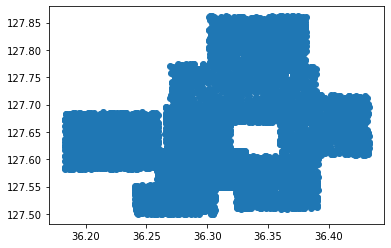

In [32]:
plt.scatter(ndf.Latitude, ndf.Longitude)
plt.show

In [33]:
from sklearn import cluster

#DBSCAN 모형 객체 생성
dbscan0 = cluster.DBSCAN(eps = 0.009, min_samples = 15)

#dbscan0 = cluster.DBSCAN(eps = 0.007, min_samples = 30)일때 : 20개
#dbscan0 = cluster.DBSCAN(eps = 0.005, min_samples = 30) : 12개
#dbscan0 = cluster.DBSCAN(eps = 0.009, min_samples = 30) : 23개
#dbscan0 = cluster.DBSCAN(eps = 0.009, min_samples = 15) : 27개

#모형학습
dbscan0.fit(ndf)

#예측
cluster_label0 = dbscan0.labels_
print(cluster_label0)
print('\n')

#예측 결과를 데이터 프레임에 추가
ndf['Cluster_num'] = cluster_label0
print(ndf.Cluster_num)

[0 0 0 ... 0 0 0]


0       0
1       0
2       0
3       0
4       0
       ..
1105    0
1106    0
1107    0
1108    0
1109    0
Name: Cluster_num, Length: 13849, dtype: int64


In [34]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cluster_label0)) - (1 if -1 in cluster_label0 else 0)
n_noise_ = list(cluster_label0).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 0


In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 클러스터링 결과를 바탕으로 동적으로 색을 할당
unique_clusters = ndf['Cluster_num'].unique()
num_clusters = len(unique_clusters)
colors_dynamic = list(mcolors.CSS4_COLORS.values())  # CSS4 색상 목록 사용

# 색상 리스트에서 필요한 수만큼 색상 추출
colors = colors_dynamic[:num_clusters]

# 그래프로 표현 - 시각화
cluster_map_oc = folium.Map(location=[np.mean(ndf.Latitude), np.mean(ndf.Longitude)], zoom_start=11)

for lat, lng, clus in zip(ndf.Latitude, ndf.Longitude, ndf.Cluster_num):
    color_index = np.where(unique_clusters == clus)[0][0]
    color = colors[color_index]
    
    folium.CircleMarker([lat, lng],
                        radius=5,
                        color=color,
                        fill=True,
                        fill_color=color,
                        fill_opacity=0.7
                       ).add_to(cluster_map_oc)

# 지도 html 파일로 저장
cluster_map_oc.save('./dbscan_난수데이터.html')

## 읍면별 DBSCAN

### target1 옥천읍

In [93]:
# 중앙 좌표 기준으로 지도 생성
map_center1 = [merged_df_옥천읍_target1["Latitude"].mean(), merged_df_옥천읍_target1["Longitude"].mean()]  # 중앙 좌표 설정
map = folium.Map(location=map_center1, zoom_start=10) 

#DBSCAN 모형 객체 생성
dbscan1 = cluster.DBSCAN(eps = 0.0014, min_samples = 15)

#모형학습
dbscan1.fit(merged_df_옥천읍_target1)

#예측
cluster_label1 = dbscan1.labels_
print(cluster_label1)
print('\n')

#예측 결과를 데이터 프레임에 추가
merged_df_옥천읍_target1['Cluster_num'] = cluster_label1
print(merged_df_옥천읍_target1.Cluster_num)


colors = {0:'red', 1:'blue', 2:'cyan', 3:'yellow', 4:'green', 5:'teal',
           6:'coral', 7:'olive', 8:'khaki', 9:'tomato', 10:'maroon',
           11:'lime', -1: 'gray'}

# 지도에 마커 추가
for lat, lng, clus in zip(merged_df_옥천읍_target1.Latitude, merged_df_옥천읍_target1.Longitude, merged_df_옥천읍_target1.Cluster_num):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity = 0.5
                       ).add_to(map)

# 지도를 html 파일로 저장
map.save('./dbscan_target1_옥천읍.html')

# 클러스터 개수, 노이즈 개수
n_clusters_ = len(set(cluster_label1)) - (1 if -1 in cluster_label1 else 0)
n_noise_ = list(cluster_label1).count(-1)

print("clusters 수: %d" % n_clusters_)
print("noise points 수: %d" % n_noise_)

[-1 -1 -1 ... -1  9 -1]


0      -1
1      -1
2      -1
3      -1
4      -1
       ..
5325   -1
5326   -1
5327   -1
5328    9
5329   -1
Name: Cluster_num, Length: 5330, dtype: int64
clusters 수: 12
noise points 수: 5131


### target2 이원면

In [83]:
# 중앙 좌표 기준으로 지도 생성
map_center2 = [merged_df_이원면_target2["Latitude"].mean(), merged_df_이원면_target2["Longitude"].mean()]  # 중앙 좌표 설정
map = folium.Map(location=map_center2, zoom_start=10) 

#DBSCAN 모형 객체 생성
dbscan2 = cluster.DBSCAN(eps = 0.0055, min_samples = 20)

#모형학습
dbscan2.fit(merged_df_이원면_target2)

#예측
cluster_label2 = dbscan2.labels_
print(cluster_label2)
print('\n')

#예측 결과를 데이터 프레임에 추가
merged_df_이원면_target2['Cluster_num'] = cluster_label2
print(merged_df_이원면_target2.Cluster_num)


colors = {0:'red', 1:'blue', 2:'cyan', 3:'yellow', 4:'green', 5:'teal',
           6:'coral', 7:'olive', 8:'khaki', 9:'tomato', 10:'maroon',
           11:'lime', -1: 'gray'}

# 지도에 마커 추가
for lat, lng, clus in zip(merged_df_이원면_target2.Latitude, merged_df_이원면_target2.Longitude, merged_df_이원면_target2.Cluster_num):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity = 0.5
                       ).add_to(map)

# 지도를 html 파일로 저장
map.save('./dbscan_target2_이원면.html')

# 클러스터 개수, 노이즈 개수
n_clusters_ = len(set(cluster_label2)) - (1 if -1 in cluster_label2 else 0)
n_noise_ = list(cluster_label2).count(-1)

print("clusters 수: %d" % n_clusters_)
print("noise points 수: %d" % n_noise_)

[0 3 0 ... 1 0 0]


0       0
1       3
2       0
3       0
4       0
       ..
1608    0
1609    0
1610    1
1611    0
1612    0
Name: Cluster_num, Length: 1613, dtype: int64
clusters 수: 5
noise points 수: 158


### target3 안내면

In [81]:
# 중앙 좌표 기준으로 지도 생성
map_center3 = [merged_df_안내면_target3["Latitude"].mean(), merged_df_안내면_target3["Longitude"].mean()]  # 중앙 좌표 설정
map = folium.Map(location=map_center3, zoom_start=10) 

#DBSCAN 모형 객체 생성
dbscan3 = cluster.DBSCAN(eps = 0.0075, min_samples = 20)

#모형학습
dbscan3.fit(merged_df_안내면_target3)

#예측
cluster_label3 = dbscan3.labels_
print(cluster_label3)
print('\n')

#예측 결과를 데이터 프레임에 추가
merged_df_안내면_target3['Cluster_num'] = cluster_label3
print(merged_df_안내면_target3.Cluster_num)


colors = {0:'red', 1:'blue', 2:'cyan', 3:'yellow', 4:'green', 5:'teal',
           6:'coral', 7:'olive', 8:'khaki', 9:'tomato', 10:'maroon',
           11:'lime', -1: 'gray'}

# 지도에 마커 추가
for lat, lng, clus in zip(merged_df_안내면_target3.Latitude, merged_df_안내면_target3.Longitude, merged_df_안내면_target3.Cluster_num):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity = 0.5
                       ).add_to(map)

# 지도를 html 파일로 저장
map.save('./dbscan_target3_안내면.html')

# 클러스터 개수, 노이즈 개수
n_clusters_ = len(set(cluster_label3)) - (1 if -1 in cluster_label3 else 0)
n_noise_ = list(cluster_label3).count(-1)

print("clusters 수: %d" % n_clusters_)
print("noise points 수: %d" % n_noise_)

[ 1  0  5  1  1  1  5  1  1  1  1  1 -1  1  1  1  1  1  5  1  1  1  0  1
  1  1  1 -1  0  1  1  1  6 -1  1  1  1  4  1  1  1  1  1 -1  1  1  4  1
  1  1  1  0  1  1  1  1  1  1  1  5  1  1  1  1  1  4  4 -1  4  3  1  1
  1  1  1  1  1  1  1 -1  1  1  1  2  2  3  1  6  1 -1  0 -1  1  1  3  1
  1 -1  2  2 -1  0  1  1  1  4  6  3  1  1  1 -1  1  1  1 -1  4  0 -1 -1
  1 -1 -1  4  1  3  1 -1  5  0  1  5  1  1  5  2  1  0 -1 -1  5  1 -1  1
  1  5  1  1 -1  4 -1 -1  2  1 -1  1  1  5  1  1  1  1  1  1  1  6  3  2
  4  1  1  1 -1  1  1  0  1  1  1  4  1  1 -1  1  1 -1  1  1  2  1  5  3
  1 -1  2  1  0  1  1  1  4  1  1  1  1  1  1 -1  5  1  1  1  1  5  4  0
  1  1  1  1  4 -1  4  1  1  1 -1  1 -1  5  0  1  1  5  1 -1  1  1  1  1
 -1  1  1  1  0  1  1  1  1  0  1  2 -1  1  3  1  1  1  2  4 -1  2  1  3
  1  3  1  2  1  1  1 -1  1  1  5  5  1  1 -1  1  1  1  1  1  3  1  1  1
  1 -1 -1  4  1  0  1  1  1  4 -1 -1  1  1  2  1  1  1  1  5  2  5  1  0
  0  0 -1  1  1  3  1  1 -1  1  1  4  1  1  1  1  1

### target4 안남면

In [79]:
# 중앙 좌표 기준으로 지도 생성
map_center4 = [merged_df_안남면_target4["Latitude"].mean(), merged_df_안남면_target4["Longitude"].mean()]  # 중앙 좌표 설정
map = folium.Map(location=map_center4, zoom_start=10) 

#DBSCAN 모형 객체 생성
dbscan4 = cluster.DBSCAN(eps = 0.0045, min_samples = 20)

#모형학습
dbscan4.fit(merged_df_안남면_target4)

#예측
cluster_label4 = dbscan4.labels_
print(cluster_label4)
print('\n')

#예측 결과를 데이터 프레임에 추가
merged_df_안남면_target4['Cluster_num'] = cluster_label4
print(merged_df_안남면_target4.Cluster_num)


colors = {0:'red', 1:'blue', 2:'cyan', 3:'yellow', 4:'green', 5:'teal',
           6:'coral', 7:'olive', 8:'khaki', 9:'tomato', 10:'maroon',
           11:'lime', -1: 'gray'}

# 지도에 마커 추가
for lat, lng, clus in zip(merged_df_안남면_target4.Latitude, merged_df_안남면_target4.Longitude, merged_df_안남면_target4.Cluster_num):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity = 0.5
                       ).add_to(map)

# 지도를 html 파일로 저장
map.save('./dbscan_target4_안남면.html')

# 클러스터 개수, 노이즈 개수
n_clusters_ = len(set(cluster_label4)) - (1 if -1 in cluster_label4 else 0)
n_noise_ = list(cluster_label4).count(-1)

print("clusters 수: %d" % n_clusters_)
print("noise points 수: %d" % n_noise_)

[ 0  0  0  5  0  0 -1  0  4  5  4  1  0  4  0  0  0  5 -1  5 -1 -1  2  1
  2  0 -1  1  2  6  2  0  2  0  3 -1  0 -1 -1  4  3  5  4  4 -1 -1 -1  6
  2 -1  1  0  1  0  2  4  4  0  5  0  4  5 -1 -1 -1  0  0  1  5  2 -1  2
  4  2 -1  1  0 -1  1  5  0  0  0 -1  2 -1  3  5  0 -1 -1  0 -1  4  1 -1
 -1 -1  1  1  2  0  0 -1  4  5 -1 -1  3  4 -1 -1 -1  0  2 -1  4  1 -1  5
  0 -1 -1 -1  5  5  0  0  5 -1  5  5  0 -1 -1 -1  0  5 -1  0  4 -1 -1  4
 -1  5  0  0 -1 -1 -1 -1 -1  0 -1 -1  5 -1  0 -1  0 -1 -1 -1  0  0  3  5
  0  1  0 -1  3  4  1 -1  5  0  2  0 -1 -1  4 -1 -1 -1  1  0 -1 -1  0 -1
  0  1  4  1 -1  4 -1  0 -1 -1 -1 -1  4  4 -1  1  0  4  1 -1 -1  2  0 -1
  5  0 -1  0  5  0  5  0  3 -1  0  1  5  1  1  5 -1 -1  2  0 -1 -1 -1  2
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  4 -1 -1 -1  0  1  4  2  2  2  0  0  0  6
 -1 -1  5  5 -1  1 -1  0  5 -1  4 -1  2  3  4 -1  4  0  5  1  4  0  3 -1
  5  4 -1 -1  0 -1  4 -1  0 -1  0 -1  5  0 -1  0  1 -1  0 -1 -1  2 -1  6
 -1  0  3  3 -1  0  3  4  0  0 -1  2 -1 -1  2 -1  1

### target5 군서면

In [72]:
# 중앙 좌표 기준으로 지도 생성
map_center5 = [merged_df_군서면_target5["Latitude"].mean(), merged_df_군서면_target5["Longitude"].mean()]  # 중앙 좌표 설정
map = folium.Map(location=map_center5, zoom_start=10) 

#DBSCAN 모형 객체 생성
dbscan5 = cluster.DBSCAN(eps = 0.0045, min_samples = 20)

#모형학습
dbscan5.fit(merged_df_군서면_target5)

#예측
cluster_label5 = dbscan5.labels_
print(cluster_label5)
print('\n')

#예측 결과를 데이터 프레임에 추가
merged_df_군서면_target5['Cluster_num'] = cluster_label5
print(merged_df_군서면_target5.Cluster_num)


colors = {0:'red', 1:'blue', 2:'cyan', 3:'yellow', 4:'green', 5:'teal',
           6:'coral', 7:'olive', 8:'khaki', 9:'tomato', 10:'maroon',
           11:'lime', -1: 'gray'}

# 지도에 마커 추가
for lat, lng, clus in zip(merged_df_군서면_target5.Latitude, merged_df_군서면_target5.Longitude, merged_df_군서면_target5.Cluster_num):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity = 0.5
                       ).add_to(map)

# 지도를 html 파일로 저장
map.save('./dbscan_target5_군서면.html')

# 클러스터 개수, 노이즈 개수
n_clusters_ = len(set(cluster_label5)) - (1 if -1 in cluster_label5 else 0)
n_noise_ = list(cluster_label5).count(-1)

print("clusters 수: %d" % n_clusters_)
print("noise points 수: %d" % n_noise_)

[ 5  0  1  0 -1  7  2  0 -1  3  0 -1 -1  0  0  8 -1  0 -1 -1  6 -1 -1  1
  0  1  1  1  2  1  3  5  0  2  3  3  4  3  1  0  1 -1  2  1 -1  6 -1  1
  3  4  0  1  6  1 -1  7  4 -1  4 -1  1 -1  1 -1  2 -1  4 -1  2  0  5  1
 -1  3 -1  4 -1 -1  5 -1  1  1 -1 -1  5 -1 -1  2  7  7 -1 -1 -1  1  1  0
  1 -1  1  1 -1 -1 -1  0  5  4  0  1  6 -1 -1 -1  1 -1  0  1  0  2  2  1
  6 -1  1  2  0  5 -1 -1 -1  4  1  6  1 -1  2  2  6 -1  5 -1 -1  1  1  0
  5 -1  1 -1  5  4 -1  1 -1  1  1 -1  2 -1  0  7  1 -1  3  0 -1  2 -1  1
 -1  1  1 -1 -1 -1  6 -1  3  2  3  4  6  1  5 -1 -1  4 -1  2  5  2  1  5
  2 -1 -1 -1 -1  2  1  2  0  3  1 -1 -1  6  1 -1  1  1  4  2  6 -1  1  0
  1 -1 -1  1  2  0 -1  1  2 -1  1  1  1  2 -1 -1  1  1 -1  4 -1  1 -1  1
  0 -1  4 -1 -1  7 -1  1 -1 -1  0 -1  2 -1  0 -1 -1 -1  0  1 -1 -1  1  6
 -1  3  2  0 -1  2 -1  2  0  1 -1  3  0  3  1 -1  0  2  1  2  1  5  1  3
  0  2  0  2  0  1  3 -1  7  0  2 -1  2  6 -1 -1  1  2  5 -1  4 -1  0  0
 -1  1  3 -1 -1  1 -1  1 -1  5  0 -1 -1  5  4 -1  8

### target6 군북면

In [67]:
# 중앙 좌표 기준으로 지도 생성
map_center6 = [merged_df_군북면_target6["Latitude"].mean(), merged_df_군북면_target6["Longitude"].mean()]  # 중앙 좌표 설정
map = folium.Map(location=map_center6, zoom_start=10) 

#DBSCAN 모형 객체 생성
dbscan6 = cluster.DBSCAN(eps = 0.005, min_samples = 20)

#모형학습
dbscan6.fit(merged_df_군북면_target6)

#예측
cluster_label6 = dbscan6.labels_
print(cluster_label6)
print('\n')

#예측 결과를 데이터 프레임에 추가
merged_df_군북면_target6['Cluster_num'] = cluster_label6
print(merged_df_군북면_target6.Cluster_num)


colors = {0:'red', 1:'blue', 2:'cyan', 3:'yellow', 4:'green', 5:'teal',
           6:'coral', 7:'olive', 8:'khaki', 9:'tomato', 10:'maroon',
           11:'lime', -1: 'gray'}

# 지도에 마커 추가
for lat, lng, clus in zip(merged_df_군북면_target6.Latitude, merged_df_군북면_target6.Longitude, merged_df_군북면_target6.Cluster_num):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity = 0.5
                       ).add_to(map)

# 지도를 html 파일로 저장
map.save('./dbscan_target6_군북면.html')

# 클러스터 개수, 노이즈 개수
n_clusters_ = len(set(cluster_label6)) - (1 if -1 in cluster_label6 else 0)
n_noise_ = list(cluster_label6).count(-1)

print("clusters 수: %d" % n_clusters_)
print("noise points 수: %d" % n_noise_)

[ 0 -1  4 ... -1 -1 -1]


0       0
1      -1
2       4
3      -1
4      -1
       ..
1024   -1
1025   -1
1026   -1
1027   -1
1028   -1
Name: Cluster_num, Length: 1029, dtype: int64
clusters 수: 6
noise points 수: 878


### target7 동이면

In [60]:
# 중앙 좌표 기준으로 지도 생성
map_center7 = [merged_df_동이면_target7["Latitude"].mean(), merged_df_동이면_target7["Longitude"].mean()]  # 중앙 좌표 설정
map = folium.Map(location=map_center7, zoom_start=10) 

#DBSCAN 모형 객체 생성
dbscan7 = cluster.DBSCAN(eps = 0.0065, min_samples = 20)

#모형학습
dbscan7.fit(merged_df_동이면_target7)

#예측
cluster_label7 = dbscan7.labels_
print(cluster_label7)
print('\n')

#예측 결과를 데이터 프레임에 추가
merged_df_동이면_target7['Cluster_num'] = cluster_label7
print(merged_df_동이면_target7.Cluster_num)


colors = {0:'red', 1:'blue', 2:'cyan', 3:'yellow', 4:'green', 5:'teal',
           6:'coral', 7:'olive', 8:'khaki', 9:'tomato', 10:'maroon',
           11:'lime', -1: 'gray'}

# 지도에 마커 추가
for lat, lng, clus in zip(merged_df_동이면_target7.Latitude, merged_df_동이면_target7.Longitude, merged_df_동이면_target7.Cluster_num):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity = 0.5
                       ).add_to(map)

# 지도를 html 파일로 저장
map.save('./dbscan_target7_동이면.html')

# 클러스터 개수, 노이즈 개수
n_clusters_ = len(set(cluster_label7)) - (1 if -1 in cluster_label7 else 0)
n_noise_ = list(cluster_label7).count(-1)

print("clusters 수: %d" % n_clusters_)
print("noise points 수: %d" % n_noise_)

[0 0 0 ... 0 0 0]


0       0
1       0
2       0
3       0
4       0
       ..
1117    0
1118    0
1119    0
1120    0
1121    0
Name: Cluster_num, Length: 1122, dtype: int64
clusters 수: 1
noise points 수: 3


### target8 청산면

In [49]:
# 중앙 좌표 기준으로 지도 생성
map_center8 = [merged_df_청산면_target8["Latitude"].mean(), merged_df_청산면_target8["Longitude"].mean()]  # 중앙 좌표 설정
map = folium.Map(location=map_center8, zoom_start=10) 

#DBSCAN 모형 객체 생성
dbscan8 = cluster.DBSCAN(eps = 0.0055, min_samples = 20)

#모형학습
dbscan8.fit(merged_df_청산면_target8)

#예측
cluster_label8 = dbscan8.labels_
print(cluster_label8)
print('\n')

#예측 결과를 데이터 프레임에 추가
merged_df_청산면_target8['Cluster_num'] = cluster_label8
print(merged_df_청산면_target8.Cluster_num)


colors = {0:'red', 1:'blue', 2:'cyan', 3:'yellow', 4:'green', 5:'teal',
           6:'coral', 7:'olive', 8:'khaki', 9:'tomato', 10:'maroon',
           11:'lime', -1: 'gray'}

# 지도에 마커 추가
for lat, lng, clus in zip(merged_df_청산면_target8.Latitude, merged_df_청산면_target8.Longitude, merged_df_청산면_target8.Cluster_num):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity = 0.5
                       ).add_to(map)

# 지도를 html 파일로 저장
map.save('./dbscan_target8_청산면.html')


# 클러스터 개수, 노이즈 개수
n_clusters_ = len(set(cluster_label8)) - (1 if -1 in cluster_label8 else 0)
n_noise_ = list(cluster_label8).count(-1)

print("clusters 수: %d" % n_clusters_)
print("noise points 수: %d" % n_noise_)

[ 0  1 -1 ...  4  0  1]


0       0
1       1
2      -1
3       0
4       3
       ..
1320    0
1321   -1
1322    4
1323    0
1324    1
Name: Cluster_num, Length: 1325, dtype: int64
clusters 수: 11
noise points 수: 275


### target9 청성면

In [44]:
# 중앙 좌표 기준으로 지도 생성
map_center9 = [merged_df_청성면_target9["Latitude"].mean(), merged_df_청성면_target9["Longitude"].mean()]  # 중앙 좌표 설정
map = folium.Map(location=map_center9, zoom_start=10) 

#DBSCAN 모형 객체 생성
dbscan9 = cluster.DBSCAN(eps = 0.008, min_samples = 20)

#모형학습
dbscan9.fit(merged_df_청성면_target9)

#예측
cluster_label9 = dbscan9.labels_
print(cluster_label9)
print('\n')

#예측 결과를 데이터 프레임에 추가
merged_df_청성면_target9['Cluster_num'] = cluster_label9
print(merged_df_청성면_target9.Cluster_num)


colors = {0:'red', 1:'blue', 2:'cyan', 3:'yellow', 4:'green', 5:'teal',
           6:'coral', 7:'olive', 8:'khaki', 9:'tomato', 10:'maroon',
           11:'lime', -1: 'gray'}

# 지도에 마커 추가
for lat, lng, clus in zip(merged_df_청성면_target9.Latitude, merged_df_청성면_target9.Longitude, merged_df_청성면_target9.Cluster_num):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity = 0.5
                       ).add_to(map)

# 지도를 html 파일로 저장
map.save('./dbscan_target9_청성면.html')

# 클러스터 개수, 노이즈 개수
n_clusters_ = len(set(cluster_label9)) - (1 if -1 in cluster_label9 else 0)
n_noise_ = list(cluster_label9).count(-1)

print("clusters 수: %d" % n_clusters_)
print("noise points 수: %d" % n_noise_)

[3 2 5 ... 1 1 1]


0       3
1       2
2       5
3       0
4       6
       ..
1105    5
1106    2
1107    1
1108    1
1109    1
Name: Cluster_num, Length: 1110, dtype: int64
clusters 수: 11
noise points 수: 82
